In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Preprocessing Steps

In [ ]:
df_rent = pd.read_csv("/content/drive/MyDrive/IS4242/df_srx_Condo.csv", index_col=0)
df_rent

,Bathrooms,No. of Units,Size,Bedrooms,Primary Schools,Groceries & Supermarts,Shopping Malls,Property Name,Tenure,District,Lease Term,Room Type,Address,Date Listed,Developer,Built Year,Trains (MRT & LRT),Property,Asking,Neighborhood
0,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,JadeScape,99,D20,Flexible,Entire Unit,8 Shunfu Road (575745),2023-01-30 22:08:56,Qingjian Realty (Marymount) Pte Ltd,2022,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
1,0.166667,0.701291,0.123811,0.4,0.295082,0.227979,0.389744,JadeScape,99,D20,Flexible,Entire Unit,8 Shunfu Road (575745),2023-04-01 14:30:22,Qingjian Realty (Marymount) Pte Ltd,2022,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
2,0.166667,0.701291,0.089628,0.2,0.295082,0.227979,0.389744,JadeScape,99,D20,Flexible,Entire Unit,8 Shunfu Road (575745),2022-12-23 23:57:59,Qingjian Realty (Marymount) Pte Ltd,2022,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
3,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,JadeScape,99,D20,2+ years,Entire Unit,8 Shunfu Road (575745),2023-02-07 11:33:19,Qingjian Realty (Marymount) Pte Ltd,2022,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
4,0.166667,0.701291,0.119112,0.6,0.295082,0.227979,0.389744,JadeScape,99,D20,Flexible,Entire Unit,8 Shunfu Road (575745),2023-01-29 10:23:55,Qingjian Realty (Marymount) Pte Ltd,2022,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,0.000000,0.397887,0.050511,0.0,0.213115,0.253886,0.425641,Parc Rosewood,99,D25,Flexible,Entire Unit,81 Rosewood Drive (737788),2023-03-17 10:21:24,Kensington Land Pte Ltd,2014,"WOODLANDS SOUTH MRT,TE3",Condominium,3000.0,Big
3740,0.333333,0.396127,0.109832,0.2,0.327869,0.119171,0.271795,Dover Parkview,99,D5,2+ years,Entire Unit,32 Dover Rise (138686),2023-01-29 22:52:51,Dover Palisades Pte Ltd (Far East Organization),1997,"BUONA VISTA MRT,CC22",Condominium,5000.0,Big
3741,0.333333,0.038732,0.151650,0.4,0.382514,0.217617,0.205128,Shelford Suites,999,D11,Flexible,Entire Unit,Shelford Road,2023-03-14 00:31:03,City Developments Ltd,2011,"BOTANIC GARDENS MRT,CC19",Condominium,6800.0,Small
3742,0.166667,0.127934,0.103489,0.2,0.316940,0.072539,0.056410,The Laurels,999,D9,Flexible,Entire Unit,38 Cairnhill Road (229658),2023-03-19 21:47:38,Sing Holdings (Cairnhill) Pte Ltd,2013,"SOMERSET MRT,NS23",Condominium,7000.0,Small


In [ ]:
df_rent.shape

(3744, 20)

In [ ]:
df_rent.dtypes

Bathrooms                 float64
No. of Units              float64
Size                      float64
Bedrooms                  float64
Primary Schools           float64
Groceries & Supermarts    float64
Shopping Malls            float64
Property Name              object
Tenure                      int64
District                   object
Lease Term                 object
Room Type                  object
Address                    object
Date Listed                object
Developer                  object
Built Year                  int64
Trains (MRT & LRT)         object
Property                   object
Asking                    float64
Neighborhood               object
dtype: object

In [ ]:
import random
random.seed(2023)

## Missing Values

In [ ]:
df_rent.isna().sum()

Bathrooms                   0
No. of Units               94
Size                        0
Bedrooms                    0
Primary Schools             0
Groceries & Supermarts      0
Shopping Malls              0
Property Name               0
Tenure                      0
District                    0
Lease Term                  0
Room Type                   0
Address                     0
Date Listed                 0
Developer                   0
Built Year                  0
Trains (MRT & LRT)        142
Property                    0
Asking                      0
Neighborhood                0
dtype: int64

In [ ]:
df_rent.dropna(inplace=True)

## Duplicated Values

In [ ]:
df_rent.duplicated().sum()

1

## Outliers

<Axes: >

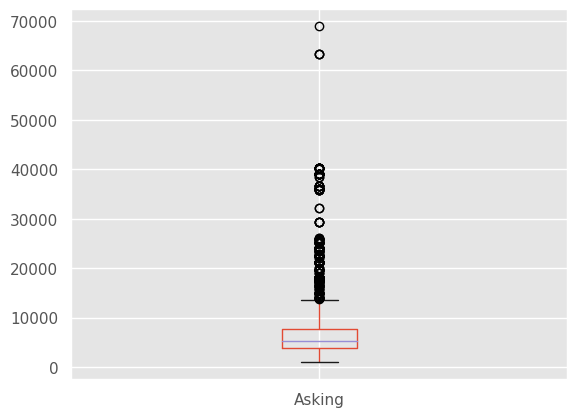

In [ ]:
df_rent.boxplot(column=['Asking'])

In [ ]:
df_rent = df_rent[(np.abs(stats.zscore(df_rent["Asking"])) < 3)]

## Categorical Variables

In [ ]:
df_rent.columns

Index(['Bathrooms', 'No. of Units', 'Size', 'Bedrooms', 'Primary Schools',
       'Groceries & Supermarts', 'Shopping Malls', 'Property Name', 'Tenure',
       'District', 'Lease Term', 'Room Type', 'Address', 'Date Listed',
       'Developer', 'Built Year', 'Trains (MRT & LRT)', 'Property', 'Asking',
       'Neighborhood'],
      dtype='object')

In [ ]:
from datetime import datetime
cat_vars = ['Lease Term', 'District', 'Room Type', 'Trains (MRT & LRT)', 'Neighborhood']
other_vars = ['Property Name','Address', 'Property', 'Date Listed', 'Developer']

# convert all categorical variables
for cat_var in cat_vars:
  df_rent = pd.concat([df_rent, pd.get_dummies(df_rent[cat_var])], axis=1)

## New Variables from Date

In [ ]:
# df_rent["Date Listed"] = df_rent.apply(lambda x: datetime.strptime(x["Date Listed"], '%Y-%m-%d %H:%M:%S'), axis=1)
# df_rent["Day Listed"] = df_rent.apply(lambda x: x["Date Listed"].day, axis=1)
# df_rent["Month Listed"] = df_rent.apply(lambda x: x["Date Listed"].month, axis=1)
# df_rent["Year Listed"] = df_rent.apply(lambda x: x["Date Listed"].year, axis=1)
# df_rent["Hour Listed"] = df_rent.apply(lambda x: x["Date Listed"].hour, axis=1)

# # drop all unnecessary columns
drop_columns = cat_vars + other_vars
df_rent = df_rent.drop(drop_columns, axis=1)
df_rent

,Bathrooms,No. of Units,Size,Bedrooms,Primary Schools,Groceries & Supermarts,Shopping Malls,Tenure,Built Year,Asking,...,"UPPER CHANGI MRT,DT34","UPPER THOMSON MRT,TE8","WOODLANDS MRT,NS9","WOODLANDS SOUTH MRT,TE3","WOODLEIGH MRT,NE11","YEW TEE MRT,NS5","YIO CHU KANG MRT,NS15","YISHUN MRT,NS13",Big,Small
0,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,0,1,0
1,0.166667,0.701291,0.123811,0.4,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,0,1,0
2,0.166667,0.701291,0.089628,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,0,1,0
4,0.166667,0.701291,0.119112,0.6,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,0.000000,0.397887,0.050511,0.0,0.213115,0.253886,0.425641,99,2014,3000.0,...,0,0,0,1,0,0,0,0,1,0
3740,0.333333,0.396127,0.109832,0.2,0.327869,0.119171,0.271795,99,1997,5000.0,...,0,0,0,0,0,0,0,0,1,0
3741,0.333333,0.038732,0.151650,0.4,0.382514,0.217617,0.205128,999,2011,6800.0,...,0,0,0,0,0,0,0,0,0,1
3742,0.166667,0.127934,0.103489,0.2,0.316940,0.072539,0.056410,999,2013,7000.0,...,0,0,0,0,0,0,0,0,0,1


## Clean Feature Names

In [ ]:
import re

# replace special characters with underscores --> cos of the 2 years vs 2+ years
df_rent.columns = [re.sub(r'[^\w\s]+', '_', c) for c in df_rent.columns]

# replace space with underscore
df_rent.columns = df_rent.columns.str.replace(' ', '_')
df_rent.columns

Index(['Bathrooms', 'No__of_Units', 'Size', 'Bedrooms', 'Primary_Schools',
       'Groceries___Supermarts', 'Shopping_Malls', 'Tenure', 'Built_Year',
       'Asking',
       ...
       'UPPER_CHANGI_MRT_DT34', 'UPPER_THOMSON_MRT_TE8', 'WOODLANDS_MRT_NS9',
       'WOODLANDS_SOUTH_MRT_TE3', 'WOODLEIGH_MRT_NE11', 'YEW_TEE_MRT_NS5',
       'YIO_CHU_KANG_MRT_NS15', 'YISHUN_MRT_NS13', 'Big', 'Small'],
      dtype='object', length=171)

## Logarithmic

In [ ]:
import numpy as np
from scipy import stats

# Load your data and split into features and target variable
X = df_rent[df_rent.columns[~df_rent.columns.isin(["Asking"])]]
y = df_rent[['Asking']]

# Test for normality using the Shapiro-Wilk test
stat, p = stats.shapiro(y)
print('Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The dependent variable is normally distributed (fail to reject H0)')
else:
    print('The dependent variable is not normally distributed (reject H0)')

# Take the logarithm of the dependent variable if it is not normally distributed
if p < alpha:
    y_log = np.log(y)
    print('Logarithm transformation applied to the dependent variable')
else:
    y_log = y
    print('No logarithm transformation necessary')

Shapiro-Wilk test: Statistics=0.769, p=0.000
The dependent variable is not normally distributed (reject H0)
Logarithm transformation applied to the dependent variable


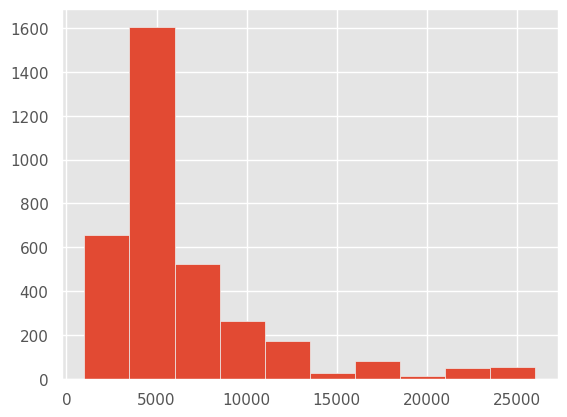

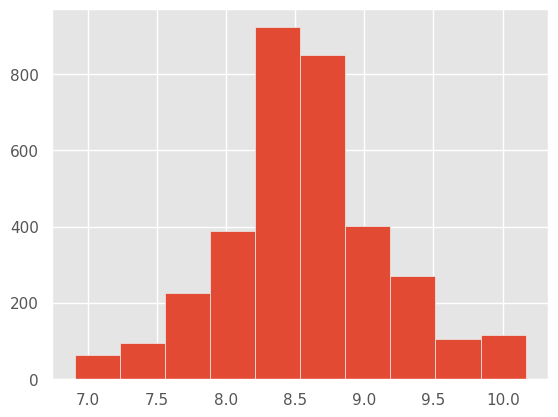

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_rent['Asking'])
plt.show()

plt.hist(np.log(df_rent['Asking']))
plt.show()

In [ ]:
df_rent["Asking_Log"] = np.log(df_rent["Asking"])
df = df_rent

## Train Test Split

In [ ]:
df_rent

,Bathrooms,No__of_Units,Size,Bedrooms,Primary_Schools,Groceries___Supermarts,Shopping_Malls,Tenure,Built_Year,Asking,...,UPPER_THOMSON_MRT_TE8,WOODLANDS_MRT_NS9,WOODLANDS_SOUTH_MRT_TE3,WOODLEIGH_MRT_NE11,YEW_TEE_MRT_NS5,YIO_CHU_KANG_MRT_NS15,YISHUN_MRT_NS13,Big,Small,Asking_Log
0,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,1,0,8.656955
1,0.166667,0.701291,0.123811,0.4,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,1,0,8.656955
2,0.166667,0.701291,0.089628,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,1,0,8.656955
3,0.000000,0.701291,0.075766,0.2,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,1,0,8.656955
4,0.166667,0.701291,0.119112,0.6,0.295082,0.227979,0.389744,99,2022,5750.0,...,0,0,0,0,0,0,0,1,0,8.656955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,0.000000,0.397887,0.050511,0.0,0.213115,0.253886,0.425641,99,2014,3000.0,...,0,0,1,0,0,0,0,1,0,8.006368
3740,0.333333,0.396127,0.109832,0.2,0.327869,0.119171,0.271795,99,1997,5000.0,...,0,0,0,0,0,0,0,1,0,8.517193
3741,0.333333,0.038732,0.151650,0.4,0.382514,0.217617,0.205128,999,2011,6800.0,...,0,0,0,0,0,0,0,0,1,8.824678
3742,0.166667,0.127934,0.103489,0.2,0.316940,0.072539,0.056410,999,2013,7000.0,...,0,0,0,0,0,0,0,0,1,8.853665


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = df[df.columns[~df.columns.isin(["Asking_Log", "Asking"])]]
y_price = df[['Asking']]

train_X, test_X, train_y_price, test_y_price = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Logarithmic of y 
train_y = np.log(train_y_price)
test_y = np.log(test_y_price)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(train_X)
X_test_pca = pca.transform(test_X)

In [ ]:
train_X

,Bathrooms,No__of_Units,Size,Bedrooms,Primary_Schools,Groceries___Supermarts,Shopping_Malls,Tenure,Built_Year,1_year,...,UPPER_CHANGI_MRT_DT34,UPPER_THOMSON_MRT_TE8,WOODLANDS_MRT_NS9,WOODLANDS_SOUTH_MRT_TE3,WOODLEIGH_MRT_NE11,YEW_TEE_MRT_NS5,YIO_CHU_KANG_MRT_NS15,YISHUN_MRT_NS13,Big,Small
831,0.000000,0.401995,0.017503,0.0,0.202186,0.316062,0.282051,99,2000,0,...,0,0,0,0,0,0,0,0,1,0
3338,0.166667,0.533451,0.102197,0.2,0.415301,0.393782,0.400000,99,2016,0,...,0,0,0,0,0,0,0,0,1,0
2014,0.000000,0.528756,0.017503,0.0,0.262295,0.243523,0.225641,99,2017,0,...,0,0,0,0,0,0,0,0,1,0
981,0.500000,0.164906,0.428404,0.6,0.344262,0.259067,0.241026,999,1990,0,...,0,0,0,0,0,0,0,0,0,1
2527,0.000000,0.237676,0.023376,0.0,0.442623,0.176166,0.292308,99,2016,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.833333,0.046362,0.820392,1.0,0.513661,0.347150,0.312821,999,1988,0,...,0,0,0,0,0,0,0,0,0,1
1207,0.500000,0.359155,0.300599,0.8,0.398907,0.471503,0.533333,999,1978,0,...,0,0,0,0,0,0,0,0,1,0
1375,0.333333,0.090376,0.187830,0.4,0.349727,0.124352,0.066667,999,2013,0,...,0,0,0,0,0,0,0,0,0,1
889,0.333333,0.166667,0.152943,0.4,0.994536,0.253886,0.917949,99,2014,0,...,0,0,0,0,0,0,0,0,0,1


## Error Metric

RMSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def update_score(df_score, model, y_test, y_pred_test, test_X, train_X):
# Store results as dataframe
  new_row = {'Model': model,
            'R^2':r2_score(y_test, y_pred_test),
            'Adjusted R^2':(1 - (1-r2_score(y_test, y_pred_test))*(train_X.shape[0]-1)/(train_X.shape[0]-test_X.shape[1]-1)),
            'MAE':mean_absolute_error(y_test, y_pred_test),
            'MSE':mean_squared_error(y_test, y_pred_test),
            'RMSE':np.sqrt(mean_squared_error(y_test, y_pred_test))}
  df_score.loc[len(df_score)] = new_row
  return df_score

df_score = pd.DataFrame(columns=['Model', 'R^2', 'Adjusted R^2', 'MAE', 'MSE', 'RMSE'])

In [ ]:
df_score = pd.read_csv("/content/drive/MyDrive/IS4242/df_score_no_reviews.csv", index_col=0)
df_score

FileNotFoundError: ignored

# Group 1: Linear Regression Family

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import statsmodels.api as sm

model = sm.OLS(train_y, sm.add_constant(train_X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Asking   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     73.95
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        05:49:58   Log-Likelihood:                -121.60
No. Observations:                2752   AIC:                             559.2
Df Residuals:                    2594   BIC:                             1495.
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
pred_y = model.predict(sm.add_constant(test_X))
df_score = update_score(df_score, "Linear Regression", test_y, pred_y, test_X, train_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.25576


In [ ]:
pred_y

1032    9.786685
61      8.381604
1166    9.895752
307     8.638059
2517    8.114384
          ...   
841     9.932341
83      8.430271
58      8.499175
3552    8.246141
2380    8.412749
Length: 688, dtype: float64

### Residual Plot
Now let's plot the Residuals, i.e. $e_i = y_i -\hat{y}_i$, with respect to the predicted values $\hat{y}_i$. Ideally, this should look like a random scatter plot with zero mean and constant variance for all values of $\hat{y}_i$. This comes from the following two assumptions imposed in SLR
+ $e_i$ should be independent of feature $x_i$ and hence from $\hat{y_i}$
+ $e_i$ as a random variable should have constant variance over all the observations $i$.

In [ ]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# # sns.residplot(x=lin.fittedvalues, y=lin.resid, lowess=True)
# # plt.xlabel('ypred')
# # plt.ylabel('residuals')

# y_pred_train = model.predict(sm.add_constant(train_X)).to_frame(name="Asking_Log")

# # Residual vs fit plot
# plt.scatter(y_pred_train, train_y)
# plt.title("Residual vs Fit Plot")
# plt.xlabel("Predicted")
# plt.ylabel("Residuals")
# plt.show()

# # Normal Error
# sns.histplot(train_y - y_pred_train)
# plt.title("Normality of Residuals")
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.show()

# # # MultiCollinearity
# # corrMatrix = train_X.corr()
# # sns.heatmap(corrMatrix, annot=True)
# # plt.show()

# # Linearity
# # Independence

### Explore Features

- Multiplicative Interaction eg. A * B
- Vectorized Function eg. np.log()

https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html


In [ ]:
# from statsmodels.formula.api import ols

# poly2 = ols(formula='Price ~ horsepower + I(horsepower**2)', data=df).fit()

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# model_lasso = Lasso(alpha=0.01)
# model_lasso.fit(train_X, train_y) 

# pred_test_lasso= model_lasso.predict(test_X)
# df_score = update_score(df_score, "Lasso Regression", test_y, pred_test_lasso, test_X, train_X)
# df_score

model_lasso = Lasso()

# define the grid of hyperparameters to search over
lasso_param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 5000, 10000],
}

# perform a grid search with cross-validation to find the best hyperparameters
lasso_grid = GridSearchCV(estimator=model_lasso, param_grid=lasso_param_grid, cv=5, scoring="neg_root_mean_squared_error")
lasso_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(lasso_grid.best_params_)
best_lasso = lasso_grid.best_estimator_

pred_test_lasso = best_lasso.predict(test_X)
df_score = update_score(df_score, "Lasso Regression", test_y, pred_test_lasso, test_X, train_X)
df_score

{'alpha': 0.001, 'max_iter': 1000}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# model_ridge = Ridge(alpha=0.01)
# model_ridge.fit(train_X, train_y) 
# # pred_train_rr= rr.predict(train_X)
# # df_score = update_score(df_score, "Ridge Regression Train", train_y, pred_train_rr, train_X)

# pred_test_rr= model_ridge.predict(test_X)
# df_score = update_score(df_score, "Ridge Regression", test_y, pred_test_rr, test_X, train_X)
# df_score

model_ridge = Ridge()

# define the grid of hyperparameters to search over
ridge_param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 5000, 10000],
}

# perform a grid search with cross-validation to find the best hyperparameters
ridge_grid = GridSearchCV(estimator=model_ridge, param_grid=ridge_param_grid, cv=5, scoring="neg_root_mean_squared_error")
ridge_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(ridge_grid.best_params_)
best_ridge = ridge_grid.best_estimator_

pred_test_ridge = best_ridge.predict(test_X)
df_score = update_score(df_score, "Ridge Regression", test_y, pred_test_ridge, test_X, train_X)
df_score

{'alpha': 1, 'max_iter': 1000}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730


## Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()

# define the grid of hyperparameters to search over
elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# perform a grid search over the hyperparameters using 5-fold cross-validation
elastic_grid = GridSearchCV(estimator=model_elastic, param_grid=elastic_param_grid, cv=5, scoring="neg_root_mean_squared_error")
elastic_grid.fit(train_X, train_y)

# get the best hyperparameters and model
print(elastic_grid.best_params_)
best_elastic = elastic_grid.best_estimator_

pred_test_elastic = best_elastic.predict(test_X)
df_score = update_score(df_score, "ElasticNet Regression", test_y, pred_test_elastic, test_X, train_X)
df_score

{'alpha': 0.001, 'l1_ratio': 0.1}


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698


# Group 2: Boosting Algorithms

## XGBoost

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb

# Create an instance of the XGBRegressor and fit the data (takes 17mins to run)
xgb_param_grid = {"learning_rate": [0.1, 0.2], # Step size shrinkage used in update to prevents overfitting.
                  "max_depth"        : [10, 11], # Maximum depth of a tree. 
                  "min_child_weight" : [3, 5], # Minimum number of instances required in a child node
                  "gamma"            : [0.0, 0.1], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                  "colsample_bytree" : [0.3, 0.4] # Number of features supplied to a tree
                  }

xgb_reg = xgb.XGBRegressor(seed = 42, objective ='reg:squarederror')

xgb_reg_grid = GridSearchCV(estimator = xgb_reg, param_grid = xgb_param_grid, cv=5, n_jobs=-1, verbose=2, scoring="neg_root_mean_squared_error") 

xgb_reg_grid.fit(train_X, train_y)
xgb_reg_grid.best_params_
best_xgb_reg = xgb_reg_grid.best_estimator_

pred_test_xgb = best_xgb_reg.predict(test_X)
df_score = update_score(df_score, "XGBoost Regressor", test_y, pred_test_xgb, test_X, train_X)
df_score

# xgb = XGBRegressor()
# xgb.fit(X_train_pca, train_y)
# xgb.score(X_test_pca, test_y)
# # df_score = update_score(df_score, "XGB Regressor", test_y, pred_test_pcaxgb, test_X, train_X)
# # df_score

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698
4,XGBoost Regressor,0.867954,0.859257,0.132832,0.044571,0.211119


In [ ]:
xgb_features = pd.DataFrame([train_X.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False)

,Feature,Importance Score
15,D10,0.191513
74,DOWNTOWN_MRT_DT17,0.071446
14,D1,0.066731
118,ORCHARD_BOULEVARD_MRT_TE13,0.054788
2,Size,0.032733
...,...,...
144,SUMANG_LRT_U_C_PW6,0.0
65,CHENG_LIM_LRT_SW1,0.0
55,BOTANIC_GARDENS_MRT_CC19,0.0
75,EUNOS_MRT_EW7,0.0


In [ ]:
xgb_reg_grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 3}

In [ ]:
xgb_features = pd.DataFrame([train_X.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
15,D10,0.191513
74,DOWNTOWN_MRT_DT17,0.071446
14,D1,0.066731
118,ORCHARD_BOULEVARD_MRT_TE13,0.054788
2,Size,0.032733
0,Bathrooms,0.032348
23,D18,0.028692
38,D9,0.026669
155,TELOK_BLANGAH_MRT_CC28,0.025204
35,D4,0.020818


## LightGBM

In [ ]:
import lightgbm as lgb

# define the LightGBM model
model = lgb.LGBMRegressor()

# Define the parameter grid for hyperparameter tuning
lgb_param_grid = {
    'num_leaves': [20, 30, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10]
}

# Perform hyperparameter tuning using GridSearchCV
lgb_grid = GridSearchCV(model, lgb_param_grid, scoring='neg_mean_absolute_error', cv=5)
lgb_grid.fit(train_X, train_y)

lgb_grid.best_params_
best_lgb = lgb_grid.best_estimator_

pred_test_lgb = best_lgb.predict(test_X)
df_score = update_score(df_score, "LightGBM Regressor", test_y, pred_test_lgb, test_X, train_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698
4,XGBoost Regressor,0.867954,0.859257,0.132832,0.044571,0.211119
5,LightGBM Regressor,0.852104,0.842363,0.133895,0.049921,0.223430


## CatBoost

In [5]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
import catboost as ctb

# Create CatBoost model
model_cat = ctb.CatBoostRegressor(loss_function='MAE')

# Define parameter grid to search over
cat_param_grid = {'learning_rate': [0.05, 0.1, 0.15],
                  'depth': [4, 6, 8]}

# Optimize parameters using GridSearchCV
cat_grid = GridSearchCV(model_cat, param_grid=cat_param_grid, cv=3)
cat_grid.fit(train_X, train_y)

# Print best parameters
print("Best parameters: ", cat_grid.best_params_)

best_cat = cat_grid.best_estimator_

pred_test_cat = best_cat.predict(test_X)
df_score = update_score(df_score, "CatBoost Regressor", test_y, pred_test_cat, test_X, train_X)
df_score

Streaming output truncated to the last 5000 lines.
1:	learn: 0.3871829	total: 23ms	remaining: 11.5s
2:	learn: 0.3631086	total: 29.1ms	remaining: 9.67s
3:	learn: 0.3431052	total: 35.6ms	remaining: 8.86s
4:	learn: 0.3255887	total: 42.8ms	remaining: 8.52s
5:	learn: 0.3096575	total: 51.7ms	remaining: 8.57s
6:	learn: 0.2975360	total: 74.5ms	remaining: 10.6s
7:	learn: 0.2847010	total: 87.7ms	remaining: 10.9s
8:	learn: 0.2741615	total: 115ms	remaining: 12.7s
9:	learn: 0.2624330	total: 131ms	remaining: 13s
10:	learn: 0.2524529	total: 146ms	remaining: 13.1s
11:	learn: 0.2434657	total: 160ms	remaining: 13.2s
12:	learn: 0.2341496	total: 172ms	remaining: 13s
13:	learn: 0.2266643	total: 183ms	remaining: 12.9s
14:	learn: 0.2208187	total: 202ms	remaining: 13.2s
15:	learn: 0.2157495	total: 213ms	remaining: 13.1s
16:	learn: 0.2106569	total: 224ms	remaining: 13s
17:	learn: 0.2060564	total: 236ms	remaining: 12.9s
18:	learn: 0.2007968	total: 248ms	remaining: 12.8s
19:	learn: 0.1965912	total: 269ms	remaini

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698
4,XGBoost Regressor,0.867954,0.859257,0.132832,0.044571,0.211119
5,LightGBM Regressor,0.852104,0.842363,0.133895,0.049921,0.223430
6,CatBoost Regressor,0.864969,0.856075,0.137951,0.045579,0.213492


# Group 3: Bagging

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': [2, 3], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600] # Number of trees in the forest
}

rf_reg = RandomForestRegressor(random_state = 42)
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
rf_grid.fit(train_X, train_y)
rf_best = rf_grid.best_estimator_
rf_grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [ ]:
pred_test_rf = rf_best.predict(test_X)
df_score = update_score(df_score, "Random Forest Regressor", test_y, pred_test_rf, test_X, train_X)
df_score

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698
4,XGBoost Regressor,0.867954,0.859257,0.132832,0.044571,0.211119
5,LightGBM Regressor,0.852104,0.842363,0.133895,0.049921,0.223430
6,CatBoost Regressor,0.864969,0.856075,0.137951,0.045579,0.213492
7,Random Forest Regressor,0.873037,0.864674,0.124846,0.042855,0.207016


In [ ]:
rf_features = pd.DataFrame([train_X.columns, rf_best.feature_importances_]).T
rf_features = rf_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
rf_features = rf_features.sort_values(by = 'Importance Score', ascending = False)
rf_features

,Feature,Importance Score
2,Size,0.142276
0,Bathrooms,0.069748
3,Bedrooms,0.063267
1,No__of_Units,0.059197
4,Primary_Schools,0.058749
...,...,...
127,POTONG_PASIR_MRT_NE10,0.000037
12,6_months,0.000034
107,MARSILING_MRT_NS8,0.000029
131,RANGGUNG_LRT_SE5,0.000022


In [ ]:
path = '/content/drive/MyDrive/IS4242/rf_features_no_reviews.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  rf_features.to_csv(f)

# Group 4: Neural Network 


Try Grid Search

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

2023-04-13 14:46:47.479030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def create_model(optimizer='adam', learning_rate=0.001):
  # try pruning
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    opt = getattr(tf.optimizers, optimizer)(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_absolute_error')
    return model

# define the parameter grid for the grid search
param_grid = {
    'optimizer': ['SGD', 'Adam'],
    'learning_rate': [0.01, 0.1],
    'batch_size': [16, 32]
}

# create a KerasRegressor object to use with GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)

# create a GridSearchCV object and fit the data
nn_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
nn_grid.fit(train_X, train_y)

nn_best = nn_grid.best_estimator_
nn_grid.best_params_

pred_test_nn = nn_best.predict(test_X)
df_score = update_score(df_score, "Neural Network", test_y, pred_test_nn, test_X, train_X)
df_score

<ipython-input-65-afa792b6ca3c>:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Linear Regression,0.806208,0.793444,0.189628,0.065413,0.255760
1,Lasso Regression,0.796628,0.783233,0.194887,0.068647,0.262005
2,Ridge Regression,0.807765,0.795103,0.190753,0.064887,0.254730
3,ElasticNet Regression,0.804784,0.791926,0.192099,0.065894,0.256698
4,XGBoost Regressor,0.867954,0.859257,0.132832,0.044571,0.211119
5,LightGBM Regressor,0.852104,0.842363,0.133895,0.049921,0.223430
6,CatBoost Regressor,0.864969,0.856075,0.137951,0.045579,0.213492
7,Random Forest Regressor,0.873037,0.864674,0.124846,0.042855,0.207016
8,Neural Network,-0.035277,-0.103467,0.435029,0.349450,0.591143


In [ ]:
nn_grid.best_params_

{'batch_size': 16, 'learning_rate': 0.1, 'optimizer': 'SGD'}

In [ ]:
path = '/content/drive/MyDrive/IS4242/df_score_no_reviews.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_score.to_csv(f)

# Final Chosen Model

Calculate Rental Price Error

In [ ]:
pred_test_rf_price = np.exp(pred_test_rf)
df_result = test_y_price.copy()
df_result["Predicted Asking"] = pred_test_rf_price
df_result["Error"] = np.abs(df_result["Predicted Asking"] - df_result["Asking"] )

In [ ]:
df_result

,Asking,Predicted Asking,Error
1032,17735.714286,17861.366455,125.652169
61,4849.377049,4844.100444,5.276605
1166,21307.333333,22499.672566,1192.339233
307,7150.000000,5598.505675,1551.494325
2517,4150.000000,3447.815080,702.184920
...,...,...,...
841,22513.333333,22316.128993,197.204340
83,4849.377049,4744.204306,105.172743
58,4849.377049,4890.374999,40.997950
3552,5500.000000,5399.884297,100.115703


In [ ]:
df_result["Error"].mean()

662.4862593453662

In [ ]:
path = '/content/drive/MyDrive/IS4242/df_result_no_reviews.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_result.to_csv(f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/IS4242/rf_model_no_reviews.pkl', 'wb') as f:
    pickle.dump(rf_best, f)